In [1]:
import os, glob, gc
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import clear_output
from matplotlib import rc, rcParams

rcParams["font.family"] = "Times New Roman"
rcParams["font.size"] = 9
rc('legend', fontsize=7)
rc('text', usetex=True)

mm = 0.1/2.54

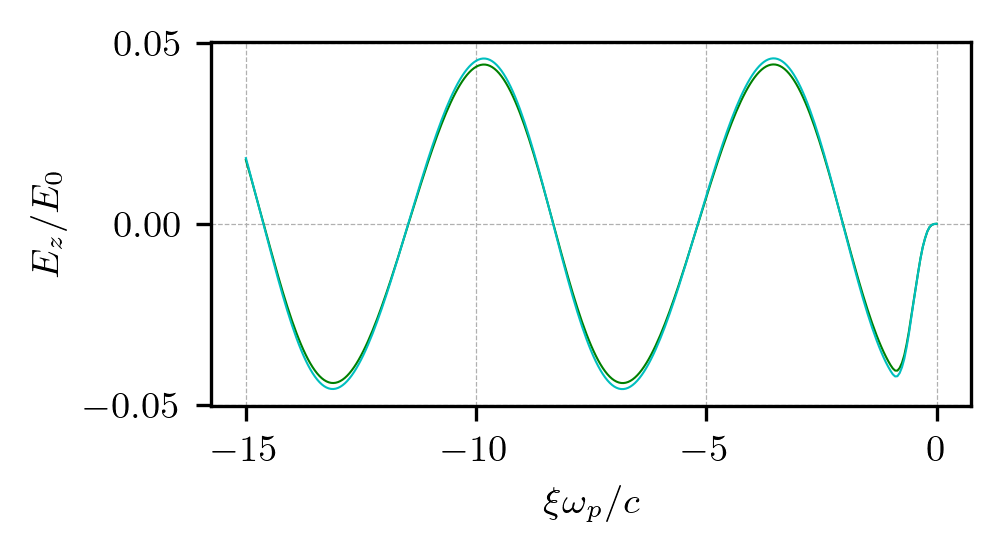

In [2]:
# Electric field on the axis

def plot_Ez(file, color='g'):
    fxi = np.load('diagnostics/' + file)
    plt.plot(fxi['xi'], fxi['Ez'], lw=0.5, color=color)

fig = plt.figure(figsize=(83*mm, 40*mm), dpi=300)
plt.grid(which='both', linestyle='--', linewidth=.3)
plot_Ez('f_xi_00025.00.npz', 'g')
plot_Ez('f_xi_00200.00.npz', 'c')

plt.ylabel(r'$E_{z}/E_{0}$')
plt.xlabel(r'$\xi\omega_{p}/c$')
plt.savefig('Ez.png', format='png', dpi=300, bbox_inches='tight')

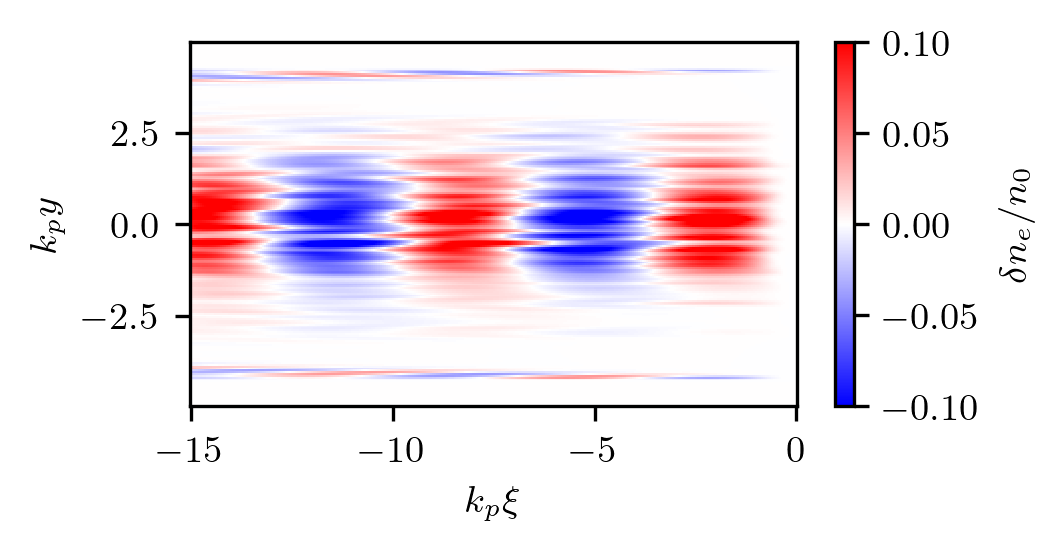

In [3]:
# Perturbation of the electron density that look noisy because of low number of macroparticles in the beam

def plot_delta_ne(time=25):
    data = np.load(f'./diagnostics/slice_{time:05d}.00.npz')
    ne = -((data['ne'] - data['ne'][0,:]).T)
    xi_grid = data['xi']
    x_grid = data['x']
    plt.pcolormesh(xi_grid, x_grid, ne, cmap='bwr', vmin=-0.1, vmax=0.1, 
                   rasterized=True)
    plt.colorbar(label=r'$\delta n_e / n_0$', orientation="vertical")
    plt.ylabel(r'$k_p y$')

fig = plt.figure(figsize=(83*mm, 40*mm), dpi=300)
plot_delta_ne(100)
plt.xlabel(r'$k_p \xi$')
plt.savefig('ne.png',format='png', dpi=300, bbox_inches='tight')

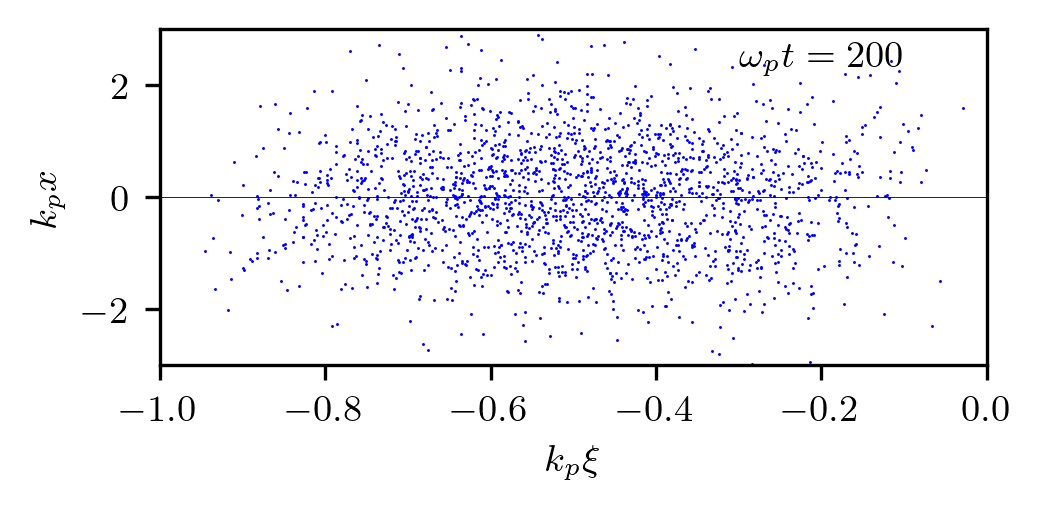

In [4]:
# Plot beam

wdir = './animation_data/'

try:
    os.mkdir(wdir)
except:
    for file in glob.glob(wdir + '*png'):
        os.remove(file)

files = sorted([i for i in glob.glob('./diagnostics/beam*npz')])
for file in files:
    time = file[-12:-7]
    fig = plt.figure(figsize=(85*mm, 40*mm), dpi=300)
    beam_3d = np.load(file)
    plt.scatter(beam_3d['xi'], beam_3d['x'], lw=0, s=0.5, c='b')
    plt.axhline(y=0, lw = 0.2, color='k')
    plt.ylabel(r'$k_p x$')
    plt.xlim(-1, 0)
    plt.ylim(-3, 3)
    plt.xlabel(r'$k_p \xi$')
    ax=plt.gca()
    plt.text(0.7, 0.89, rf'$\omega_p t={float(time):.0f}$', 
             transform=ax.transAxes, c='k')

    plt.tight_layout(pad=0.3)
    plt.savefig(wdir + 'beampart_' + time + '.png', format='png', 
                bbox_inches='tight', pad_inches = 0.02)
    plt.show()
    plt.close()
    clear_output(wait=True)
    gc.collect()


In [6]:
# Plot animation

images = []
files = sorted([i for i in glob.glob(wdir + '*png')])
for filename in files:
    images.append(imageio.imread(filename))
imageio.mimwrite('beampart.gif', images, loop=0)

